#predict a neutrino particle’s direction. using 3d visualization

#import libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import *
from sklearn.model_selection import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#load data exploratory data analysis and data preprocessing

In [36]:
train = pd.read_csv('sensor_geometry.csv')
train.head()

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95


#check for null values

In [37]:
train.isnull().sum()

sensor_id    0
x            0
y            0
z            0
dtype: int64

#check for data types

In [38]:
train.dtypes

sensor_id      int64
x            float64
y            float64
z            float64
dtype: object

#check for unique values

In [39]:
train.nunique()

sensor_id    5160
x             118
y             117
z            4975
dtype: int64

#check for correlation

In [40]:
train.corr()

,sensor_id,x,y,z
sensor_id,1.000000,0.035062,0.836541,-0.130769
x,0.035062,1.000000,0.068642,-0.011228
y,0.836541,0.068642,1.000000,0.015753
z,-0.130769,-0.011228,0.015753,1.000000


#check for outliers

<Axes: >

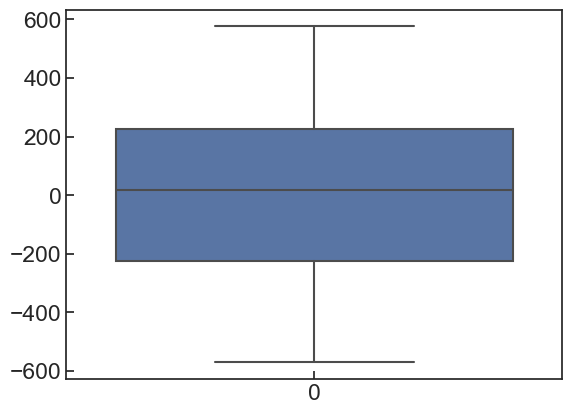

In [41]:
sns.boxplot(train['x'])

<Axes: >

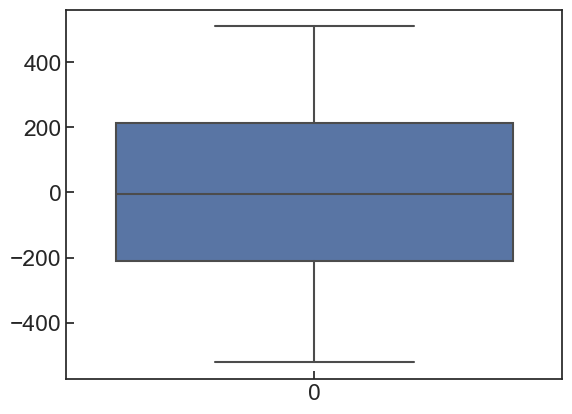

In [42]:
sns.boxplot(train['y'])

<Axes: >

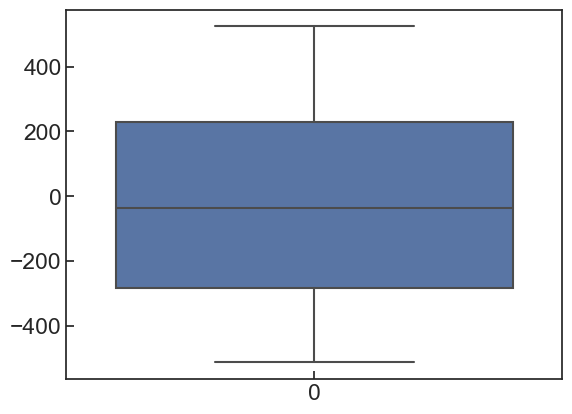

In [43]:
sns.boxplot(train['z'])

#split data into train and test

In [90]:
X = train('z',axis=1).values
y = train['z']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

TypeError: 'module' object is not callable

#plot the data using 3d visualization

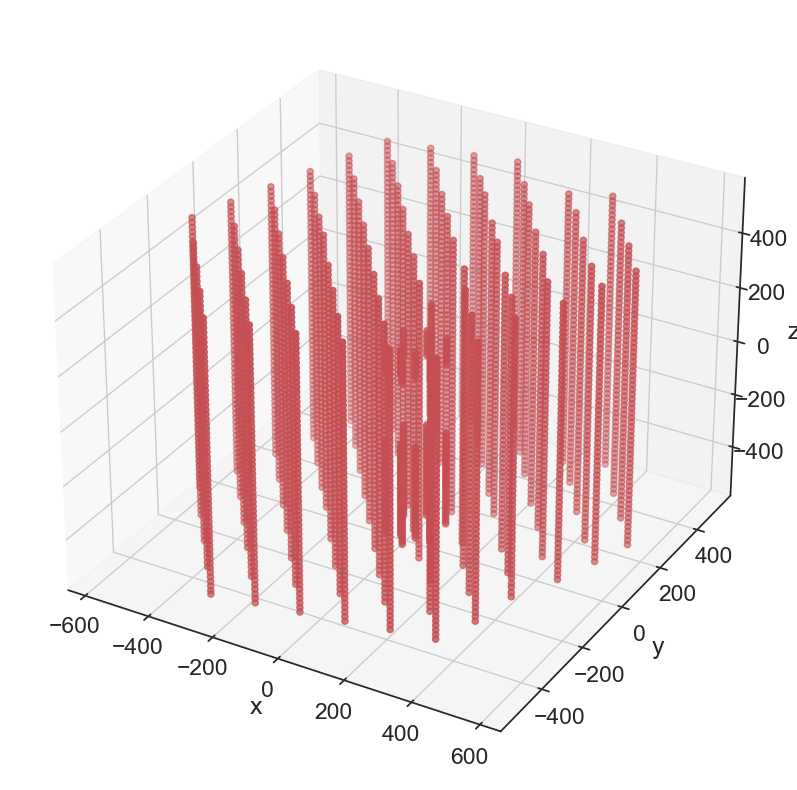

In [49]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(train['x'],train['y'],train['z'],c='r',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#build the model

In [75]:
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3))
model.compile(optimizer='adam',loss='mse')

#train the model

In [91]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=128,epochs=1000,callbacks=[early_stop])

NameError: name 'X_train' is not defined

#evaluate the model

In [76]:
losses = pd.DataFrame(model.history)
losses.plot()

TypeError: no numeric data to plot